In [1]:
##importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
##reading in the csv file 

df = pd.read_csv('train (1).csv')

In [3]:
##The first five rows of the dataset

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##the shape of the dataset

df.shape

(1460, 81)

In [5]:
##getting the names of the columns in the dataset

df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
##Separating the features into categorical and numerical features

num_feats = df.dtypes[df.dtypes != "object"].index
cat_feats = df.dtypes[df.dtypes == "object"].index
print(df[num_feats].columns)
print("-"*100)
print(df[cat_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation

In [7]:
#lets see if there are any columns with missing values 
nullvalues = df.columns[df.isnull().any()]
df[nullvalues].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Grouping by neighborhood and filling missing value by the median LotFrontage of all the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [9]:
df['Alley'] = df['Alley'].fillna('None')

In [10]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [11]:
##BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 are all categorical basement-related features,
##NaN means that there is no basement.

In [12]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')


In [13]:
##Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [14]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [15]:
##FireplaceQu : data description says NA means "no fireplace"

In [16]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [17]:
##GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [18]:
##GarageYrBlt: Replacing missing data with 0 (Since No garage = no cars in such garage.)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [19]:
##PoolQC: data description says NA means "No Pool". 
##That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

df['PoolQC'] = df['PoolQC'].fillna('None')

In [20]:
##Fence : data description says NA means "no fence"

df['Fence'] = df['Fence'].fillna('None')

In [21]:
##MiscFeature : data description says NA means "no misc feature"

df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [22]:
df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [23]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [25]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1.0, 'Correlation Matrix of 11 strongest correlated features ')

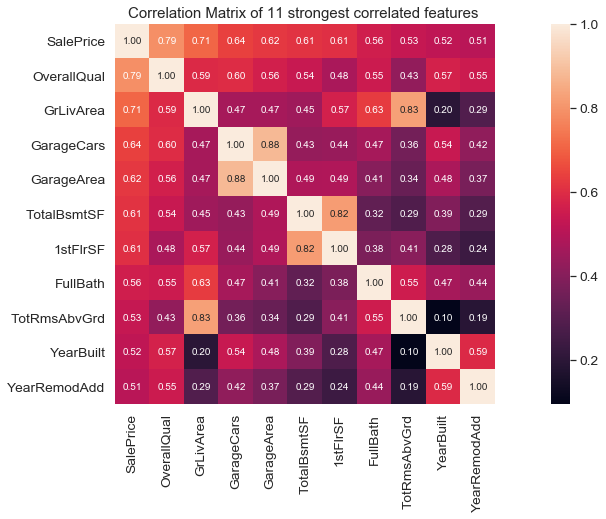

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(20,7))
k = 11 #number of variables for heatmap (including SalePrice)
cols_positive = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols_positive].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_positive.values, 
                 xticklabels=cols_positive.values)

plt.title('Correlation Matrix of 11 strongest correlated features ')

As we can see from the heatmap above, some of the Independent variables are correlated with each other. One of the basic assumptions of Linear regression is that the independent variables are not correlated with each other, if they are then we will not know which of the two variables is imparting the correct information about the Dependent variable

Text(0.5, 1.0, 'Correlation Matrix of 11 weakest correlated features ')

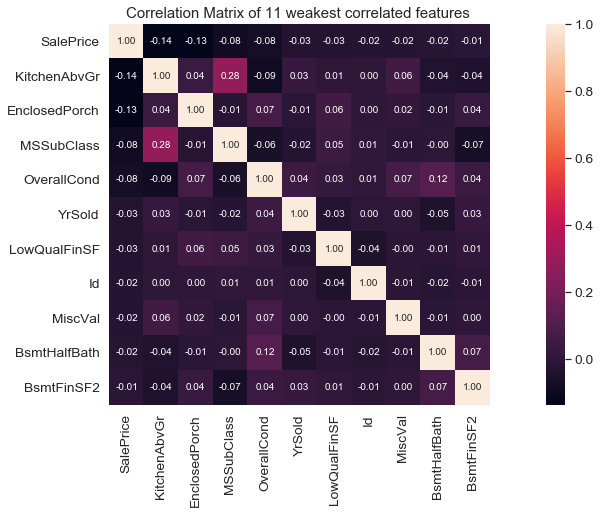

In [28]:
plt.figure(figsize=(20,7))
k = 10 #number of variables for heatmap
cols_negative = np.append(['SalePrice'], corr_matrix.nsmallest(k, 'SalePrice')['SalePrice'].index.values)
cm = np.corrcoef(df[cols_negative].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_negative, 
                 xticklabels=cols_negative)
plt.title('Correlation Matrix of 11 weakest correlated features ')

In [29]:
df[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


Text(0.5, 1.0, ' Sale Price vs Overall quality')

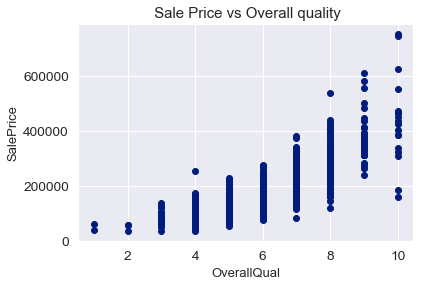

In [30]:
##The first feature which has the maximum correlation with the Sale Price is OverallQual. As we can see in the scatter plot below,
#that when the OverallQual is increasing, the average Sale Price for each OverallQual is increasing which actually makes sense.
plt.style.use('seaborn-dark-palette')
plot = plt.subplot()
plot.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.title(' Sale Price vs Overall quality')

Text(0.5, 1.0, ' Sale Price vs Garage Living Area')

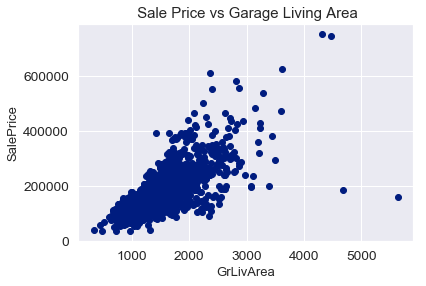

In [31]:
##Now, the second most important feature is the GrLivArea. 
#We can see in the graph that as the living area increases there is an increase in the SalePrice of the house. 
##But we can also see that there are couple of outliers where GrLivArea>4500 but Sale Price<200000.

plt.style.use('seaborn-dark-palette')
plot = plt.subplot()
plot.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title(' Sale Price vs Garage Living Area')

Text(0.5, 1.0, ' Sale Price vs Garage Cars')

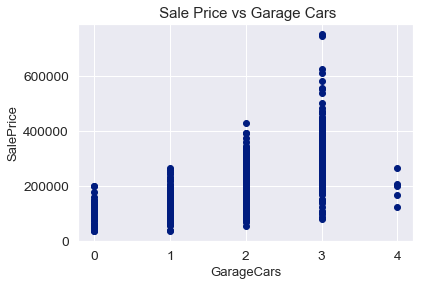

In [32]:
##Now, the third most important feature is the GarageCars. 
#We can see in the graph that as the GarageCars increases there is an increase in the SalePrice of the house. 
##But we can also see that there are couple of outliers where GarageCars >3  but Sale Price<300000.

plt.style.use('seaborn-dark-palette')
plot = plt.subplot()
plot.scatter(x = df['GarageCars'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.title(' Sale Price vs Garage Cars')

Text(0.5, 1.0, ' Sale Price vs Garage Area')

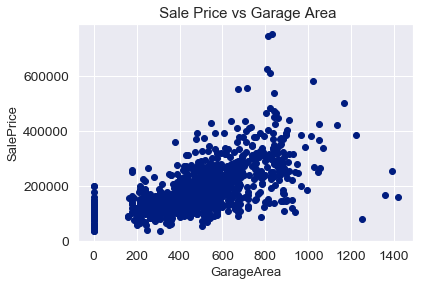

In [33]:
#Now, the fourth most important feature is the GarageArea. 
#We can see in the graph that as the GarageArea increases there is an increase in the SalePrice of the house. 
##But we can also see that there are couple of outliers where GarageArea >1200  but Sale Price<300000.

plt.style.use('seaborn-dark-palette')
plot = plt.subplot()
plot.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.title(' Sale Price vs Garage Area')

Text(0.5, 1.0, ' Sale Price vs TotalBsmtSF')

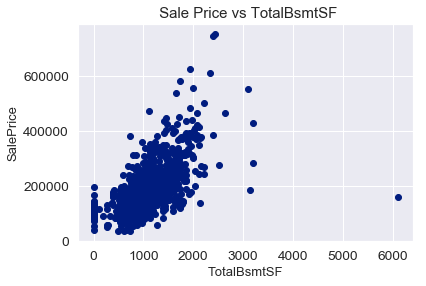

In [34]:
#Now, the fifth most important feature is the TotalBsmtSF. 
#We can see in the graph that as the TotalBsmtSF increases there is an increase in the SalePrice of the house. 
##But we can also see that there are couple of outliers where TotalBsmtSF >6000  but Sale Price<200000.

plt.style.use('seaborn-dark-palette')
plot = plt.subplot()
plot.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.title(' Sale Price vs TotalBsmtSF')     

Another point to be noted here is that GarageCars and GarageArea are correlated with each other in a sense that, larger the area, larger is the number of cars that can be accomodated. This should be investigated in the correlation matrix.

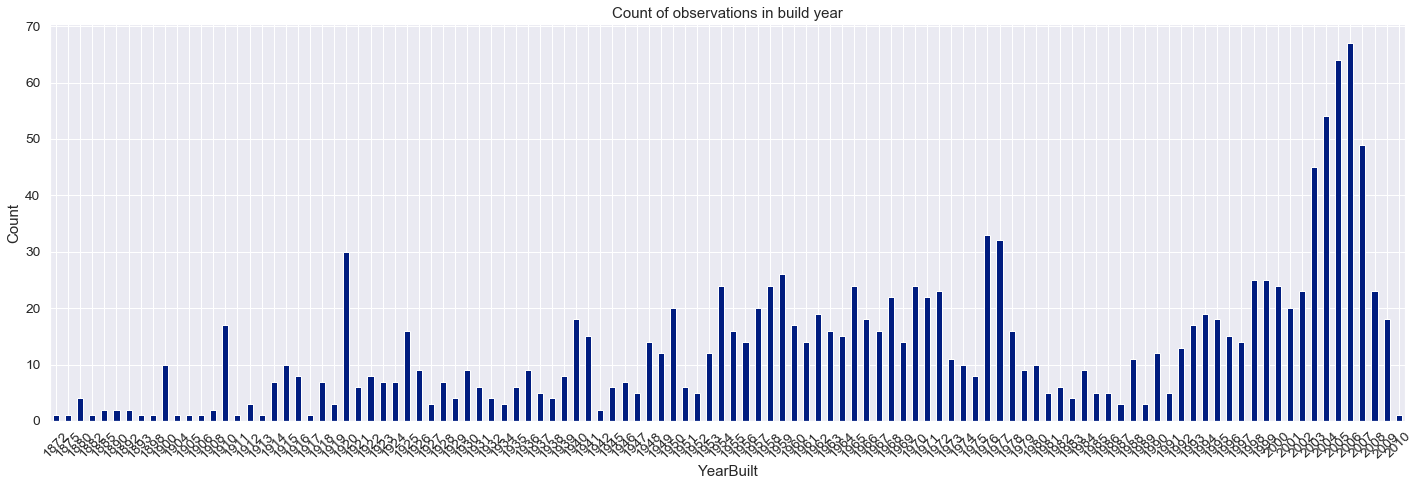

In [35]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(20,7));
df.groupby("YearBuilt").SalePrice.count().plot(kind="bar")
plt.title("Count of observations in build year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Houses that were built recently have higher prices as compared to others

Text(0.5, 1.0, 'Count of observations in build year (binned values to decades)')

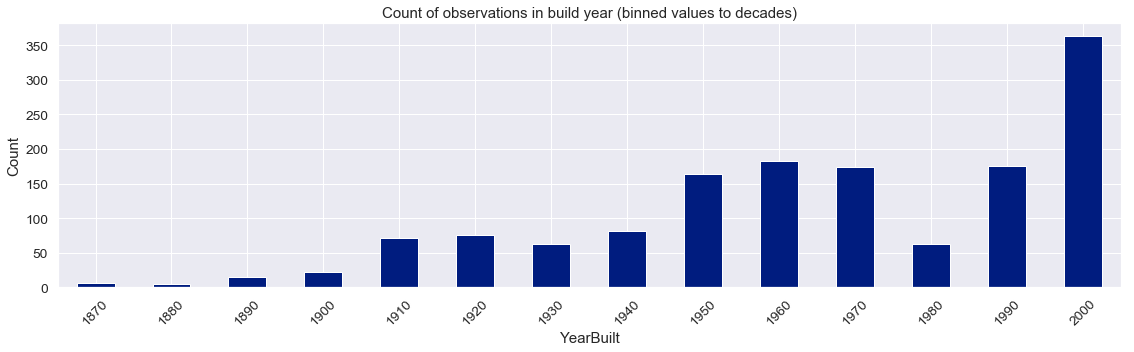

In [36]:
#bin years to decades since plotting every single year would clutter the plot
decades = np.arange(1870, 2015, 10)
df_cut = pd.cut(df.YearBuilt, bins=decades, labels=decades[:-1])
df_comb = pd.concat([df_cut, df.SalePrice], axis=1)

plt.figure(figsize=(16,5));
df_comb.groupby("YearBuilt").SalePrice.count().plot(kind="bar")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Count of observations in build year (binned values to decades)")

We observe that:

Most of the house were built after 1950.

A good third of all properties was built 1990 and later.

Newer houses tend to yield a little higher mean of sale price.

In [37]:
df['YearBuilt'].value_counts(dropna=False).sort_values(ascending=False).head()

2006    67
2005    64
2004    54
2007    49
2003    45
Name: YearBuilt, dtype: int64

Many houses were built in 2005 and 2006 as compared to other years.

Text(0.5, 1.0, 'Count of observations in years of sale')

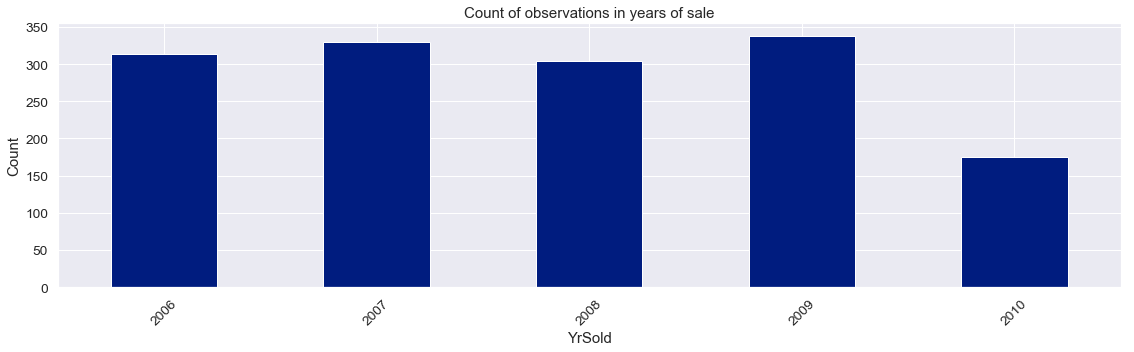

In [38]:
plt.figure(figsize=(16,5));
df.groupby("YrSold").SalePrice.count().plot(kind="bar")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Count of observations in years of sale")

Text(0.5, 1.0, 'Count of observations in months of sale')

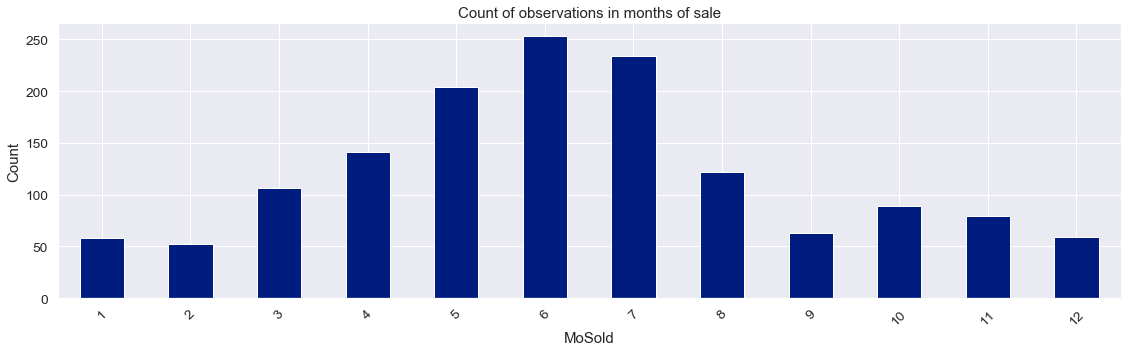

In [39]:
plt.figure(figsize=(16,5));
df.groupby("MoSold").SalePrice.count().plot(kind="bar")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0, 12), rotation=45)
plt.tight_layout()
plt.title("Count of observations in months of sale")

Observations:

Fewer sales in 2010. Could be either because less samples were collected. Or the financial crisis of 2009 hit the market.

Most sales in summer months.

In [40]:
df["Age"] = df.YrSold - df.YearBuilt
print(df.Age.describe())

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64


On average the properties were 37 years old at the time of sale (with a mean of 35 very close to that).

On average houses can be +/- 30 years older or younger than that at time of sale.

The oldest house was 136 years old and we have sales of house that were built in the year of sale.

Text(0.5, 1.0, 'Count of observations of property age (binned to decades)')

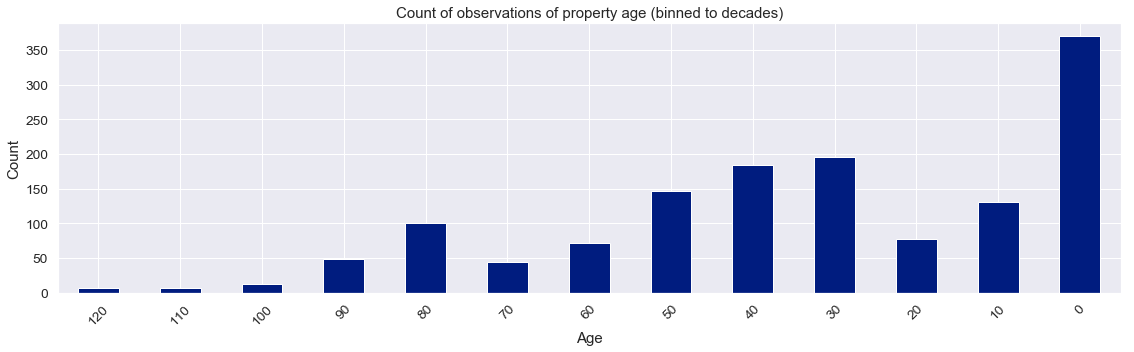

In [41]:
decades = np.arange(0, 136, 10)
df_cut = pd.cut(df.Age, bins=decades, labels=decades[:-1])
df_comb = pd.concat([df_cut, df.SalePrice], axis=1)

plt.figure(figsize=(16,5));
df_comb.groupby("Age").SalePrice.count().plot(kind="bar")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.title("Count of observations of property age (binned to decades)")

We only observe a notable difference for newer houses. E.g. the median of price for houses between 0 and 19 years of age is almost the same now.


In [42]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
order = df.groupby("MSSubClass").SalePrice.mean().sort_values(ascending=False).index

Text(0.5, 1.0, 'Count of observations for type of dwelling')

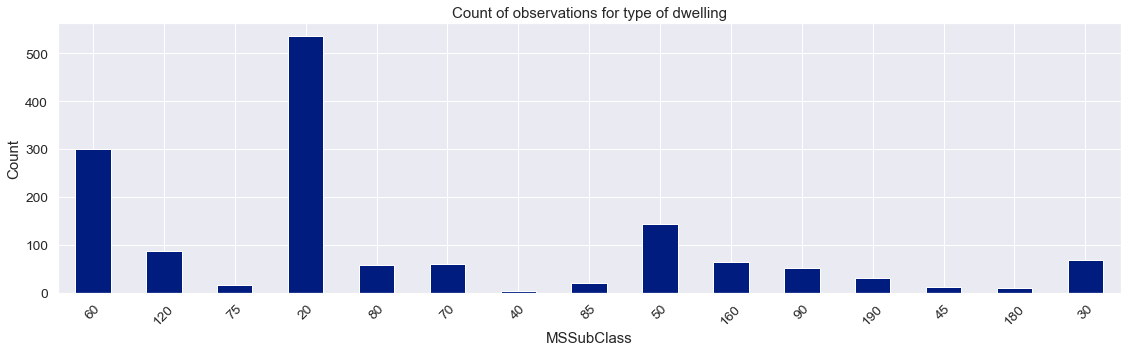

In [43]:
plt.figure(figsize=(16,5));
df_g = df.groupby("MSSubClass").SalePrice.count()
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Count of observations for type of dwelling")

Text(0.5, 1.0, 'Distribution of SalePrice for type of dwelling')

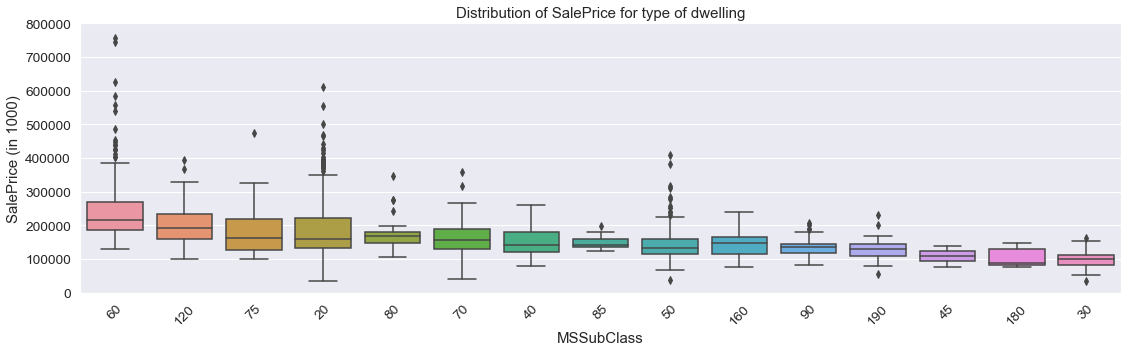

In [44]:
plt.figure(figsize=(16,5));
ax = sns.boxplot(x="MSSubClass", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Distribution of SalePrice for type of dwelling")

In [45]:
##BldgType: Type of dwelling
order = df.groupby("BldgType").SalePrice.mean().sort_values(ascending=False).index

Text(0.5, 1.0, 'Count of observations for type of dwelling (BldgType)')

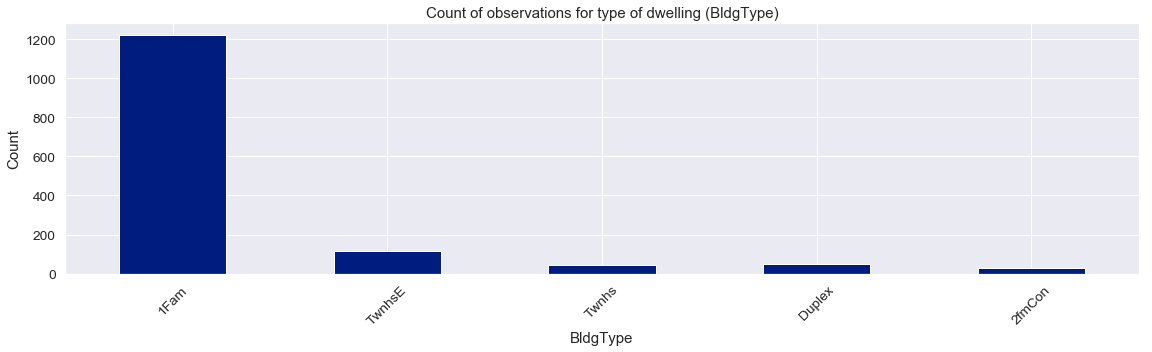

In [46]:
plt.figure(figsize=(16,5));
df_g = df.groupby("BldgType").SalePrice.count()
df_g = df_g.reindex(order)
df_g.plot(kind="bar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Count")
plt.title("Count of observations for type of dwelling (BldgType)")

Text(0.5, 1.0, 'Distribution of SalePrice for type of dwelling (Building Type)')

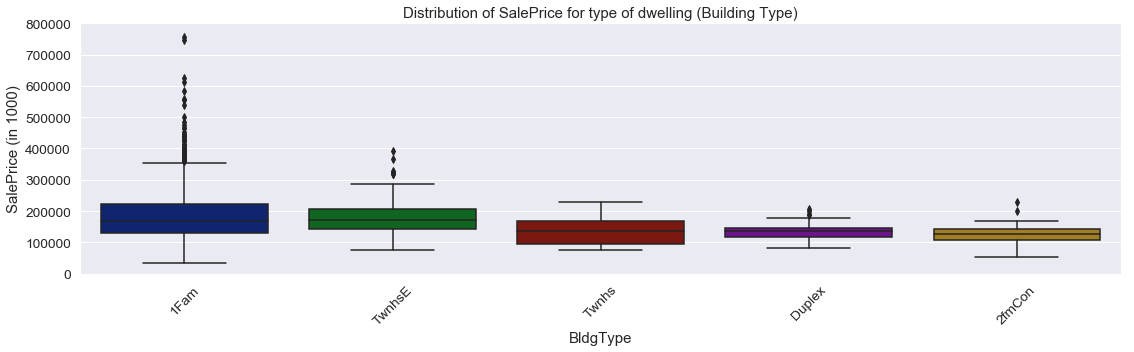

In [47]:
plt.figure(figsize=(16,5));
ax = sns.boxplot(x="BldgType", y="SalePrice", data=df, order=order)
plt.axis(ymin=0, ymax=800000)
plt.ylabel("SalePrice (in 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Distribution of SalePrice for type of dwelling (Building Type)")

Text(0.5, 1.0, 'HouseStyle vs SalePrice')

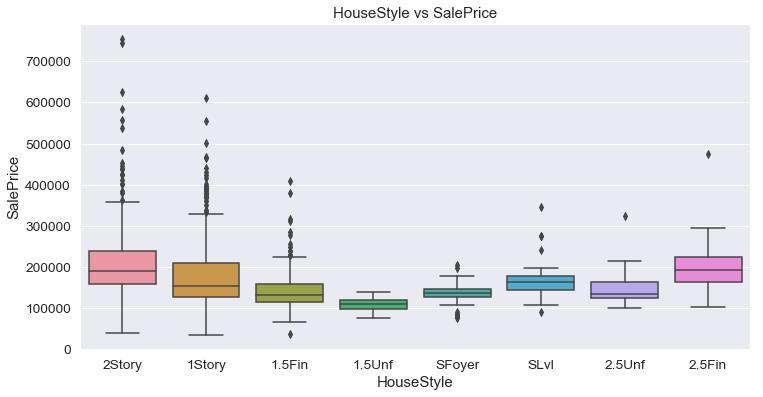

In [48]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df,x='HouseStyle',y='SalePrice')
plt.title('HouseStyle vs SalePrice')


Most of the houses are 1Story/2Story. Some of the houses have One and Half story with 2nd level unfinished etc. 

The wide mayority of properties are Single-family Detached.

Townhouse End Units (TwhnsE) come second pricewise and are more expensive than Inside Units (Twhns). Makes sense...

Two-family Conversions, originally built as one-family dwelling are the least expensives properties on average.

In [49]:
###we can see that as the amount of fireplaces increases, sale price also increases

df[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


Text(0.5, 1.0, 'Sale Price')

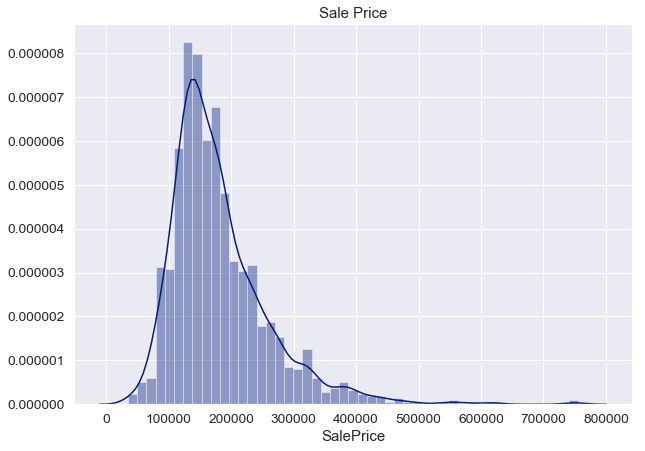

In [50]:
#histogram
plt.figure(figsize=(10, 7))
sns.distplot(df['SalePrice'])
plt.title('Sale Price')

The distribution does not look normal, it is positively skewed, some outliers can also be seen. Simple log transformation might change the distribution to normal.

Text(0.5, 1.0, 'Box plot of Sale Price')

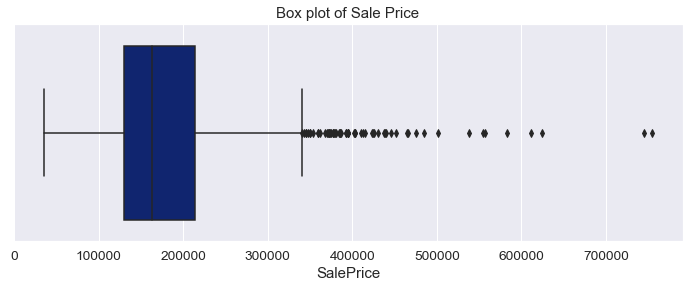

In [51]:
plt.figure(figsize=(12, 4))
sns.boxplot(df['SalePrice'])
plt.title('Box plot of Sale Price')

In [52]:
df['SalePrice'].skew()

1.8828757597682129

In [53]:
df['SalePrice'].kurt()


6.536281860064529

Text(0.5, 1.0, 'Alley vs SalePrice')

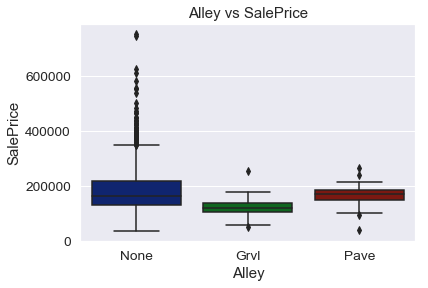

In [54]:
sns.boxplot(data=df,x='Alley',y='SalePrice')
plt.title('Alley vs SalePrice')

Text(0.5, 1.0, 'Sale Price vs Streets')

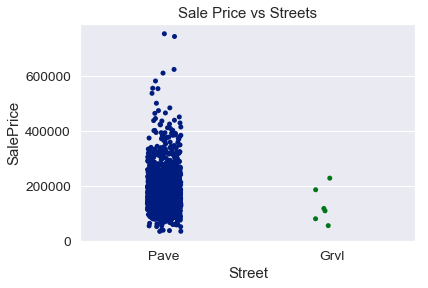

In [55]:
sns.stripplot(x=df["Street"], y=df["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets")

Text(0.5, 1.0, 'Sale Price vs Full Bathrooms')

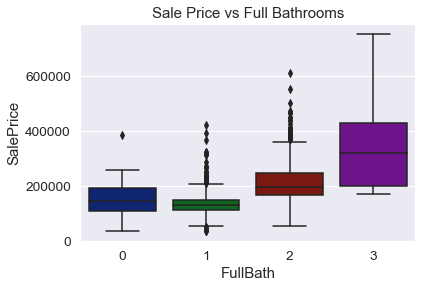

In [56]:
sns.boxplot(df["FullBath"], df["SalePrice"])
plt.title("Sale Price vs Full Bathrooms")

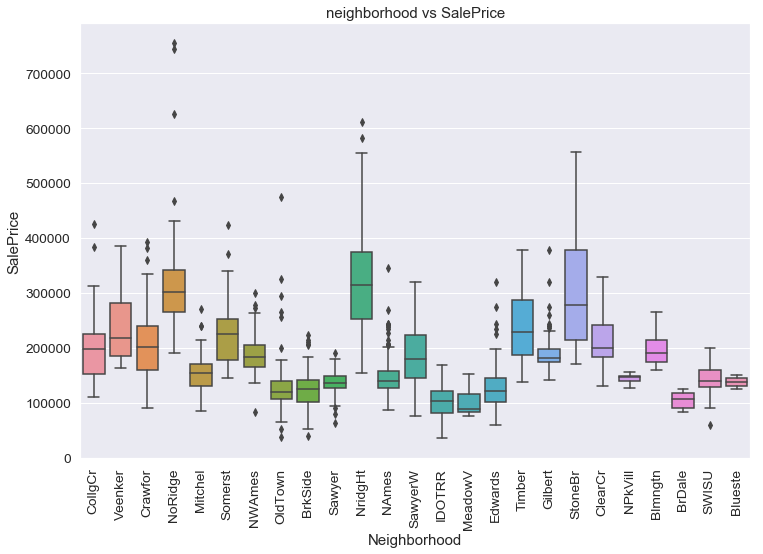

In [57]:
fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = df,ax=ax)
plt.title('neighborhood vs SalePrice')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

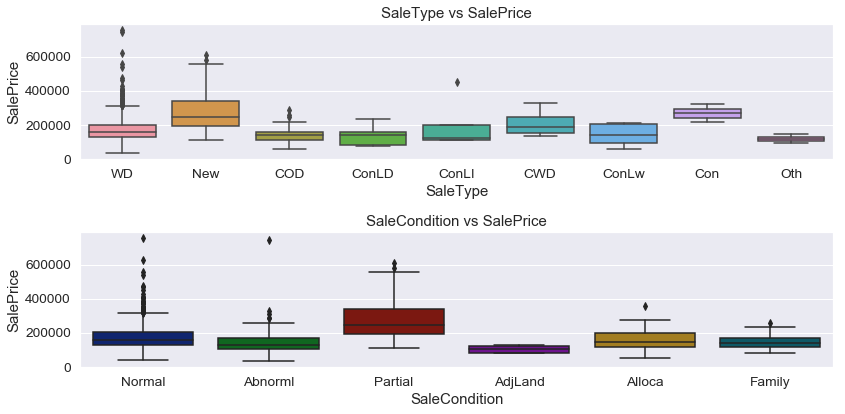

In [58]:
fig = plt.figure(2,figsize=(12,6))
plt.subplot(211)
sns.boxplot(data=df,x='SaleType',y='SalePrice')
plt.title('SaleType vs SalePrice')

plt.subplot(212)
sns.boxplot(data = df,x='SaleCondition',y='SalePrice')
plt.title('SaleCondition vs SalePrice')

plt.tight_layout()

Text(0.5, 1.0, 'Electrical vs Sale Price')

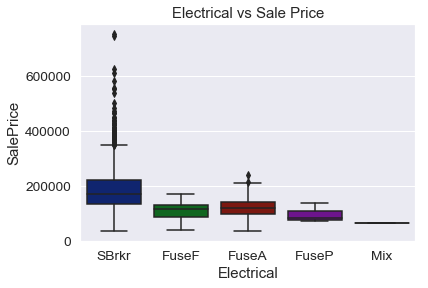

In [59]:
sns.boxplot(data=df,x='Electrical',y='SalePrice')
plt.title('Electrical vs Sale Price')

Text(0.5, 1.0, 'Neighborhood')

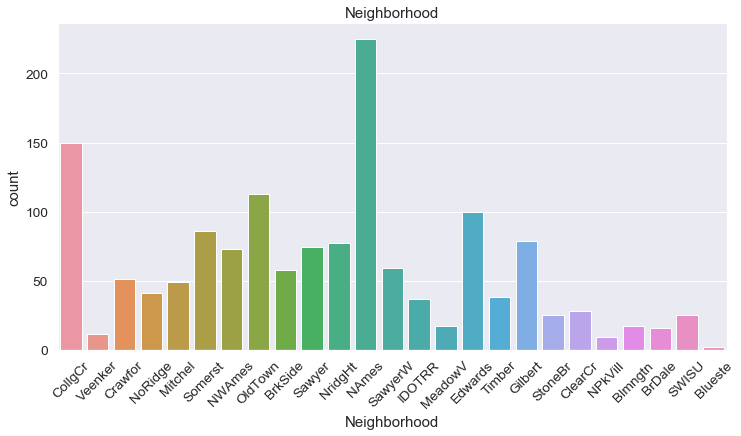

In [60]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
xt = plt.xticks(rotation=45)
plt.title('Neighborhood')

Text(0.5, 1.0, 'Roofstyle')

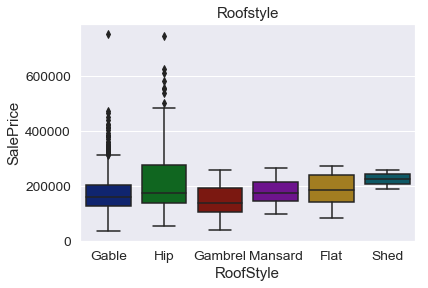

In [61]:
sns.boxplot(df['RoofStyle'], df['SalePrice'])
plt.title('Roofstyle vs Sale Price')
plt.title('Roofstyle')

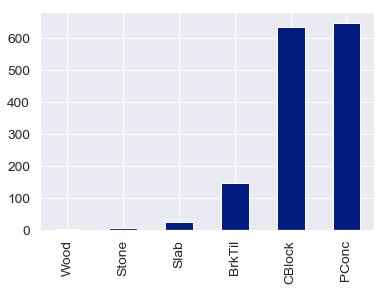

In [62]:
df['Foundation'].value_counts(dropna=False).sort_values().plot(kind='bar')

Most houses have Poured Concrete or Concrete Block as their Foundation.

Text(0.5, 1.0, 'Foundation vs Sale Price')

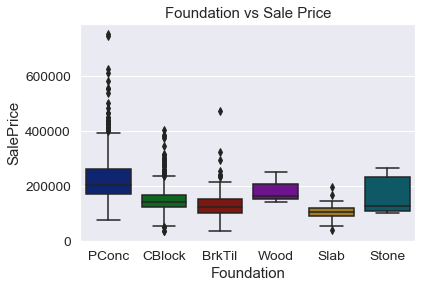

In [63]:
sns.boxplot(df['Foundation'], df['SalePrice'])
plt.title('Foundation vs Sale Price')

Poured Concrete has higher values of Sale Prices.

Text(0.5, 1.0, 'Garage Cars vs Sale Price')

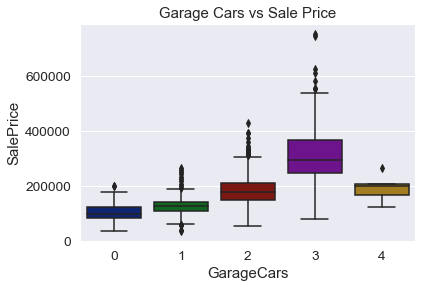

In [64]:
###Price increases with increase in accomodating capacity of the cars in the garage
sns.boxplot(df['GarageCars'],df['SalePrice'])
plt.title('Garage Cars vs Sale Price')

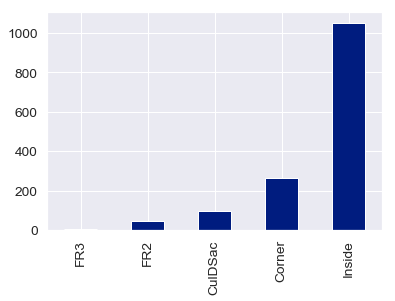

In [65]:
df['LotConfig'].value_counts().sort_values().plot(kind='bar')


Most of the houses are are Inside Lot type followed by Corner plot.

Text(0.5, 1.0, 'Overall Condition vs Sale Price')

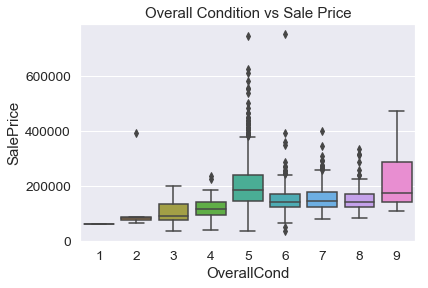

In [66]:
sns.boxplot(df['OverallCond'],df['SalePrice'])
plt.title('Overall Condition vs Sale Price')

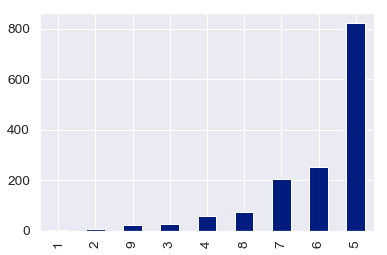

In [67]:
df['OverallCond'].value_counts().sort_values(ascending = True).plot(kind='bar')

More than 50% of the houses have average (rating of 5) overall condition of the house.

There is no house with a rating of 10.

Very few have a rating of 9.


OverallCond does not have the same affect as that of OverallQual towards SalePrice variable.

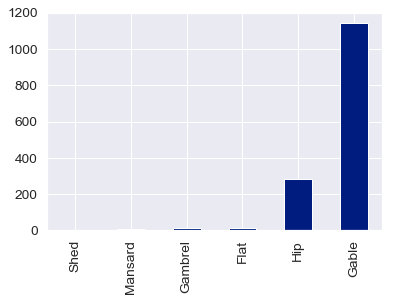

In [68]:
df['RoofStyle'].value_counts(dropna=False).sort_values().plot(kind='bar')

Most of the houses have Gable type of roof followed by Hip type.

Text(0.5, 1.0, 'Roof Style vs Sale Price')

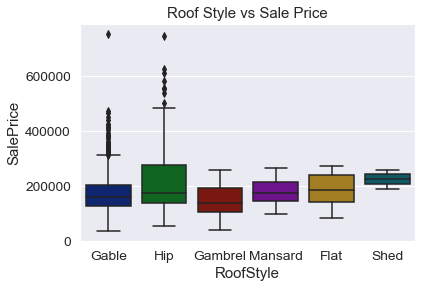

In [69]:
sns.boxplot(df['RoofStyle'], df['SalePrice'])
plt.title('Roof Style vs Sale Price')

Houses with Gable type of roof also have the highest sale price. This tells us that there is a relationship between roof type and sale price

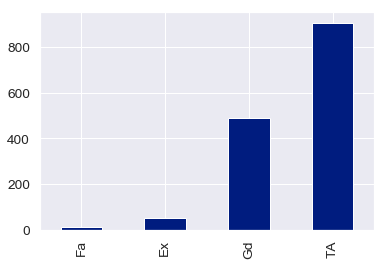

In [70]:
df['ExterQual'].value_counts(dropna=False).sort_values().plot(kind='bar')

Most of the houses have Average / Typical external quality of the house, this is followed by houses that are rated Good. No Missing values here.

Text(0.5, 1.0, 'External Qual vs Sale Price')

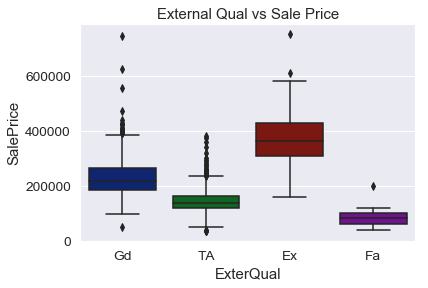

In [71]:
sns.boxplot(df['ExterQual'], df['SalePrice'])
plt.title('External Qual vs Sale Price')

The price of houses that have Excellent external quality rating are much higher as compared to others.

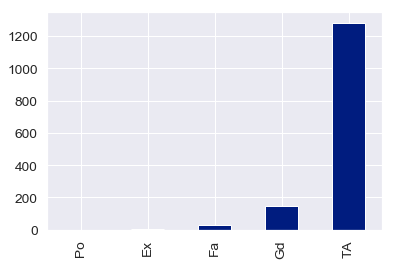

In [72]:
df['ExterCond'].value_counts(dropna=False).sort_values().plot(kind='bar')

Most of the houses have either Typical or Good condition of the material on the exterior.

Text(0.5, 1.0, 'External Condition vs Sale Price')

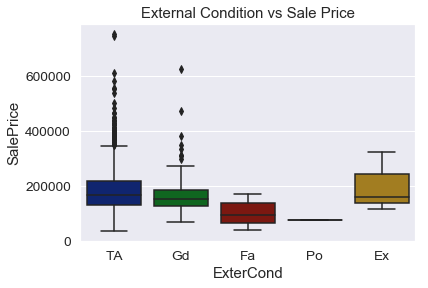

In [73]:
sns.boxplot(df['ExterCond'],df['SalePrice'])
plt.title('External Condition vs Sale Price')